# Options Part 2 - Other Options
In this notebook, we'll explore **binary options** and how they can be approximated using a combination of vanilla options. We'll start with the basics of binary options, learn about the concept of replication using vanilla options, and finish by covering other types of options such as path-dependent options.

## 1. Binary Options
Binary options are a type of option that pays out a fixed amount if the underlying asset's price is above (for a call) or below (for a put) a specific strike price at expiration.

For example, a **cash-or-nothing binary call option** pays a fixed amount $C$ if the asset price $S$ is above the strike price $K$ at expiration, and zero otherwise. This type of option is popular in markets where traders want to make a simple 'all-or-nothing' bet on price movements.

### Binary Call Option Payoff
The payoff of a cash-or-nothing binary call option at expiration is given by:

$$ \text{Payoff} = \begin{cases} C & \text{if } S \geq K \\ 0 & \text{otherwise} \end{cases} $$

Let's visualize the payoff of a binary call option below.

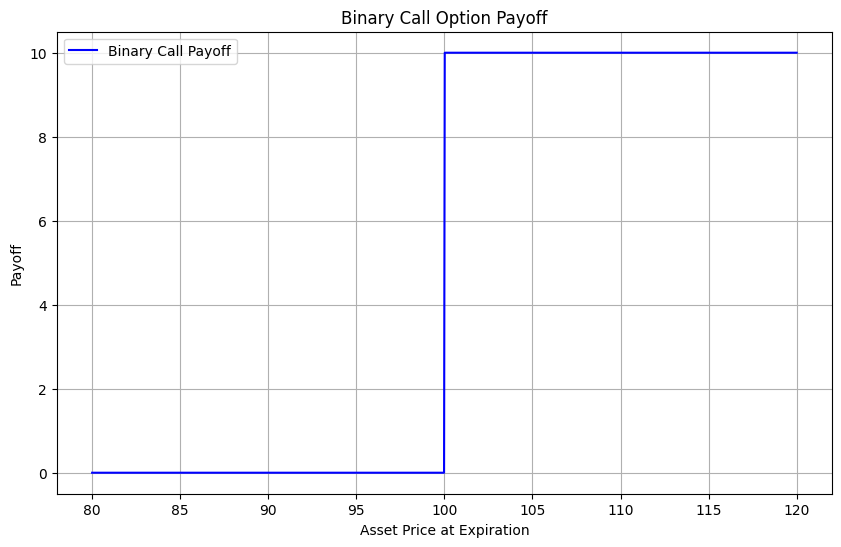

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = np.linspace(80, 120, 1000)  # Range of asset prices
K = 100  # Strike price of the binary option
C = 10  # Fixed payout of the binary option

# Payoff function for binary call option
binary_call_payoff = np.where(S >= K, C, 0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, binary_call_payoff, label='Binary Call Payoff', color='blue')
plt.xlabel('Asset Price at Expiration')
plt.ylabel('Payoff')
plt.title('Binary Call Option Payoff')
plt.legend()
plt.grid(True)
plt.show()

## 2. Replicating a Binary Option with Vanilla Options
Since binary options can be difficult to trade or hedge, we can attempt to **replicate** the payoff of a binary option using vanilla options. This involves taking positions in two call options with different strike prices:

1. **Long call option** with strike price $K - \epsilon$
2. **Short call option** with strike price $K + \epsilon$

where $\epsilon$ is a small value.

By carefully choosing $\epsilon$, we can approximate the 'all-or-nothing' behavior of a binary option, with a payoff close to the fixed payout $C$ in a narrow window around $K$. Let's see this in action with a visualization of both the individual components and the combined payoff.

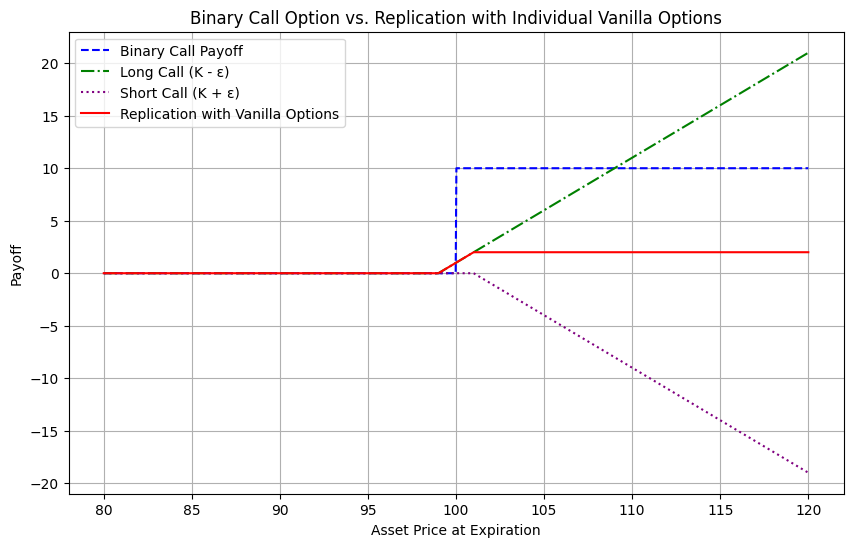

In [2]:
# Parameters
epsilon = 1  # Small interval around K

# Payoff functions for individual vanilla options
long_call_payoff = np.maximum(S - (K - epsilon), 0)  # Payoff of the long call
short_call_payoff = -np.maximum(S - (K + epsilon), 0)  # Payoff of the short call

# Combined payoff for replication
replication_payoff = long_call_payoff + short_call_payoff

# Plotting with individual option payoffs
plt.figure(figsize=(10, 6))
plt.plot(S, binary_call_payoff, label='Binary Call Payoff', linestyle='--', color='blue')
plt.plot(S, long_call_payoff, label='Long Call (K - ε)', linestyle='-.', color='green')
plt.plot(S, short_call_payoff, label='Short Call (K + ε)', linestyle=':', color='purple')
plt.plot(S, replication_payoff, label='Replication with Vanilla Options', color='red')
plt.xlabel('Asset Price at Expiration')
plt.ylabel('Payoff')
plt.title('Binary Call Option vs. Replication with Individual Vanilla Options')
plt.legend()
plt.grid(True)
plt.show()

### Observations
From the plot, we can see that the combined payoff of the two vanilla options creates an approximate payoff similar to a binary call option within the narrow range around $K$. However, due to the finite size of $\epsilon$, this replication is not exact but only an approximation.

In practice, this approach can be sensitive to the choice of $\epsilon$ and may incur transaction and hedging costs.

## 3. Detailed Replication with Adjusted Strikes (as per SA-CCR)
In the previous section, we approximated the binary option payoff using two call options with strikes close to the target strike $K$, using a narrow range ($K - \epsilon$ and $K + \epsilon$).

This approach can also be extended by adjusting the strikes to a percentage range around the binary option's strike $K$, which can more accurately replicate the binary option's behavior outside the range between two specified strikes. This method involves:

- **Buying one European option** with strike at **0.95 \* K**
- **Selling one European option** with strike at **1.05 \* K**

By using strikes at 0.95 \* K and 1.05 \* K, the replication closely mimics the payoff behavior of a binary option at prices well below 0.95 \* K or well above 1.05 \* K. Inside this range, the payoff approaches zero, creating a similar structure to the binary option.

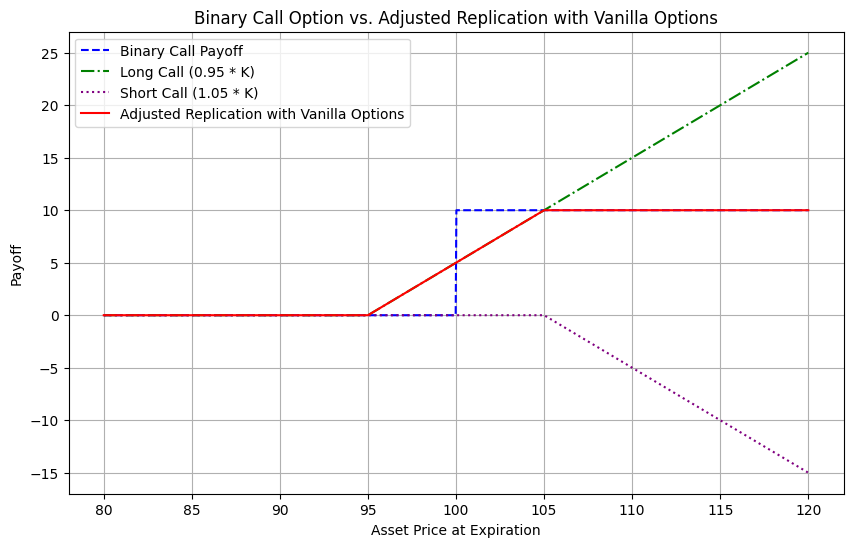

In [3]:
# Parameters
K_adj_lower = 0.95 * K  # Lower adjusted strike
K_adj_upper = 1.05 * K  # Upper adjusted strike

# Payoff functions for the adjusted vanilla options
long_call_adjusted = np.maximum(S - K_adj_lower, 0)  # Payoff of the bought option at 0.95 * K
short_call_adjusted = -np.maximum(S - K_adj_upper, 0)  # Payoff of the sold option at 1.05 * K

# Combined payoff for replication
adjusted_replication_payoff = long_call_adjusted + short_call_adjusted

# Plotting with adjusted replication
plt.figure(figsize=(10, 6))
plt.plot(S, binary_call_payoff, label='Binary Call Payoff', linestyle='--', color='blue')
plt.plot(S, long_call_adjusted, label='Long Call (0.95 * K)', linestyle='-.', color='green')
plt.plot(S, short_call_adjusted, label='Short Call (1.05 * K)', linestyle=':', color='purple')
plt.plot(S, adjusted_replication_payoff, label='Adjusted Replication with Vanilla Options', color='red')
plt.xlabel('Asset Price at Expiration')
plt.ylabel('Payoff')
plt.title('Binary Call Option vs. Adjusted Replication with Vanilla Options')
plt.legend()
plt.grid(True)
plt.show()

### Observations
With the adjusted strikes at 0.95 \* K and 1.05 \* K, the combined payoff shows how the payoff of a binary option can be more precisely matched outside the range between these two strikes.

This structure effectively caps the payoff to resemble the binary option's payout at asset prices well above or well below this range, while creating an approximation of zero payoff within the range, making it a useful replication strategy.

The exact cap on the sum of the bought and sold options can be adjusted to match the binary option's payout amount, ensuring a precise match.

## 4. Other Types of Options
In addition to binary options, there are several other types of options that offer unique payoff structures and are used in various trading and hedging strategies. Here are a few examples:

- **Path-dependent options**: These options have payoffs that depend on the path taken by the asset price, not just the final price. Examples include **Asian options** (where the payoff depends on the average price over a period) and **lookback options** (where the payoff depends on the minimum or maximum asset price during the option's life).

- **Barrier options**: These options are activated or deactivated if the asset price crosses a certain level. **Knock-in** and **knock-out** options are common barrier types.

- **Compound options**: These are options on other options, giving the holder the right to buy or sell another option.

- **Chooser options**: These allow the holder to choose whether the option will be a call or a put at a specified point during the life of the option.

These exotic options provide flexibility for advanced trading strategies and hedging needs.